<ipython-input-10-742e86395040>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_sejong['평수 반올림'] = round(df_apt_sejong['평수'], 0)
<ipython-input-10-742e86395040>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_sejong['평형'] = pd.cut(df_apt_sejong['평수 반올림'], bins=bins, labels=labels, include_lowest=True, right=False)
<ipython-input-10-742e86395040>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fal

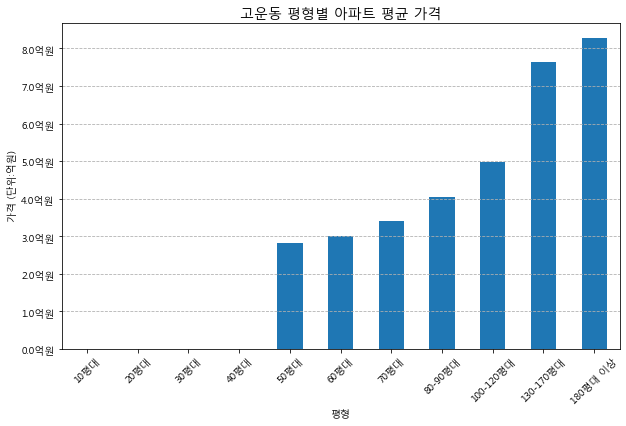

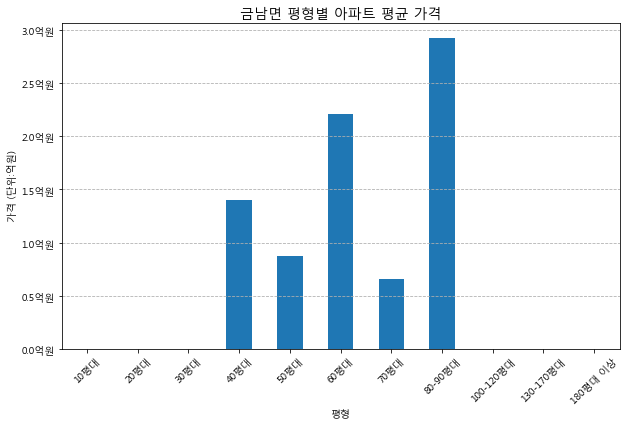

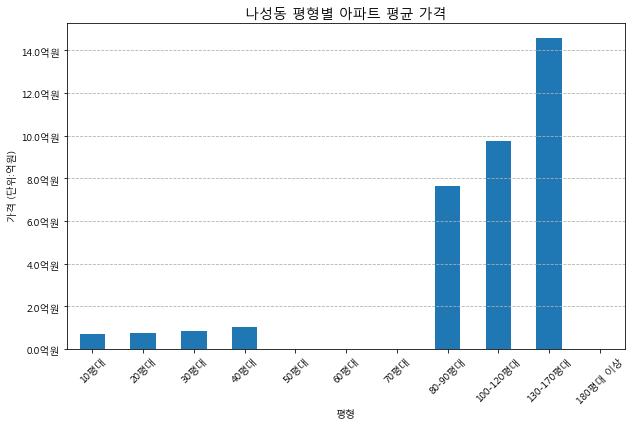

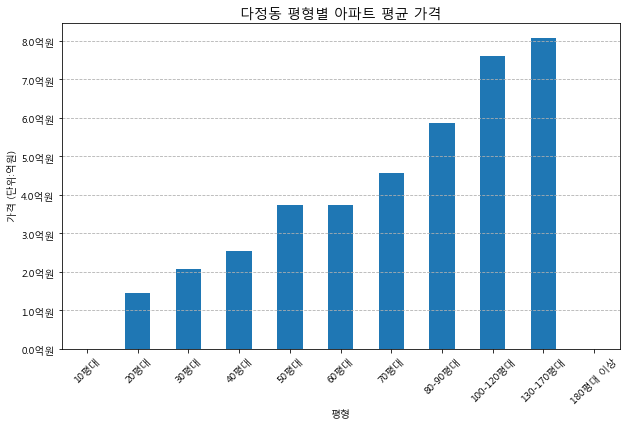

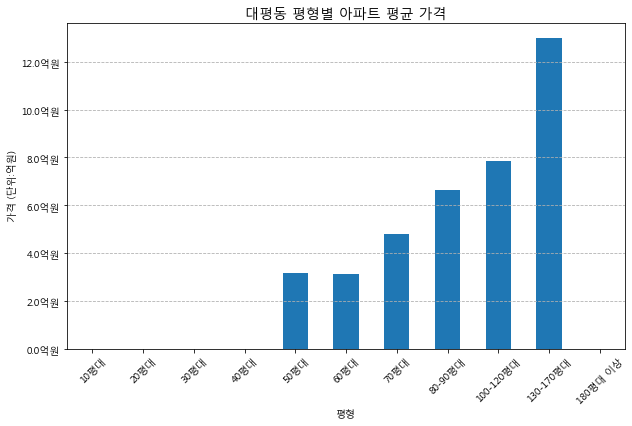

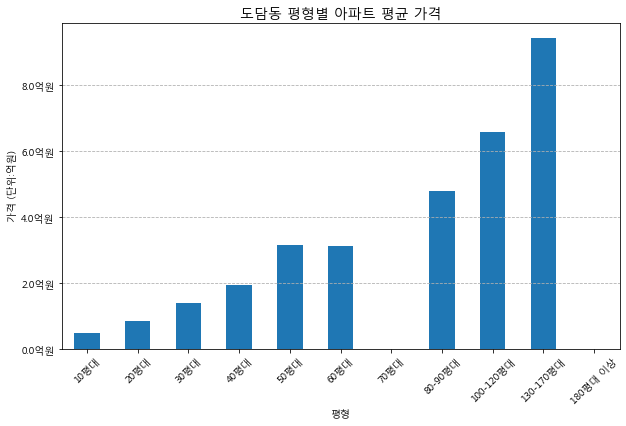

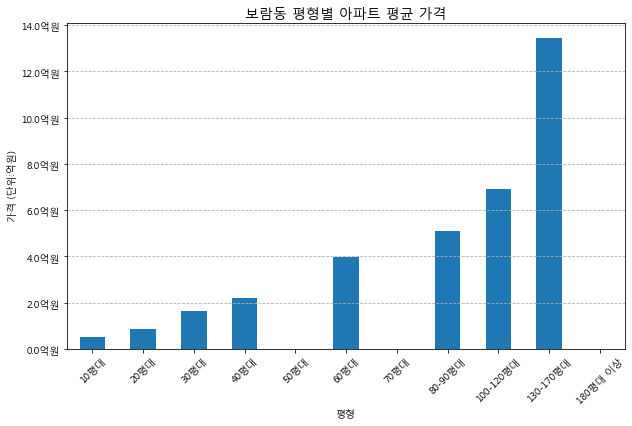

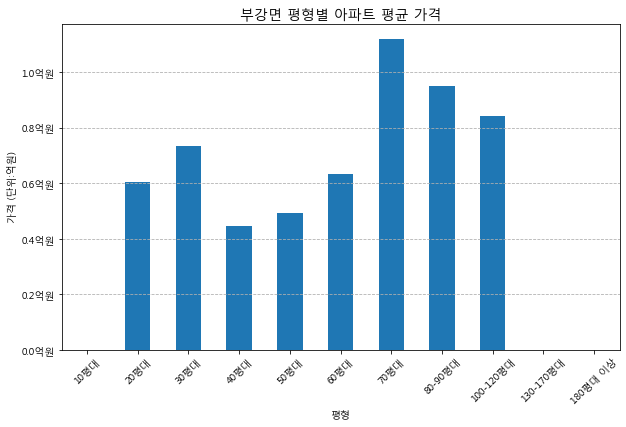

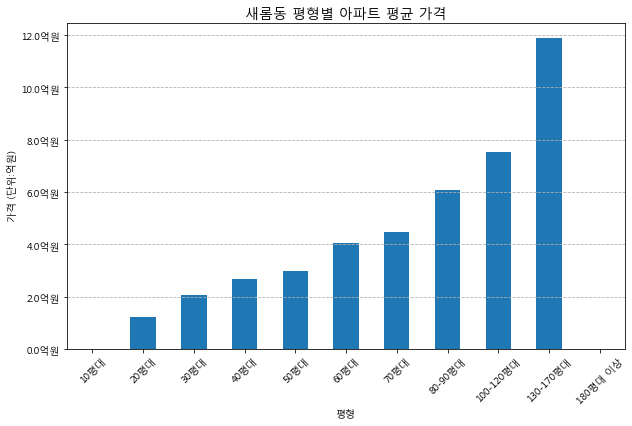

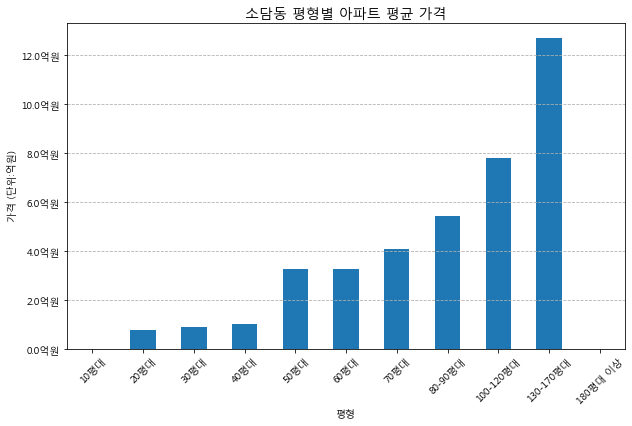

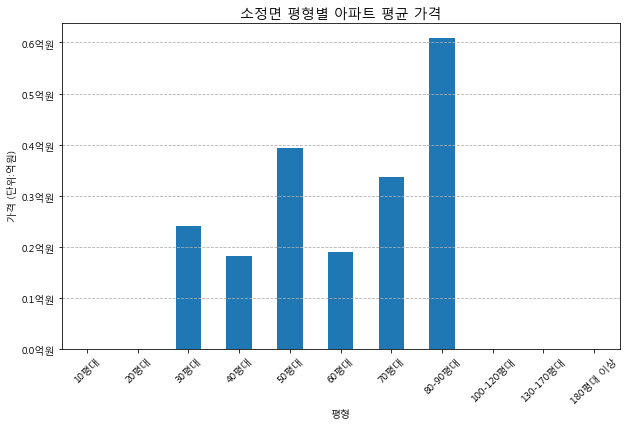

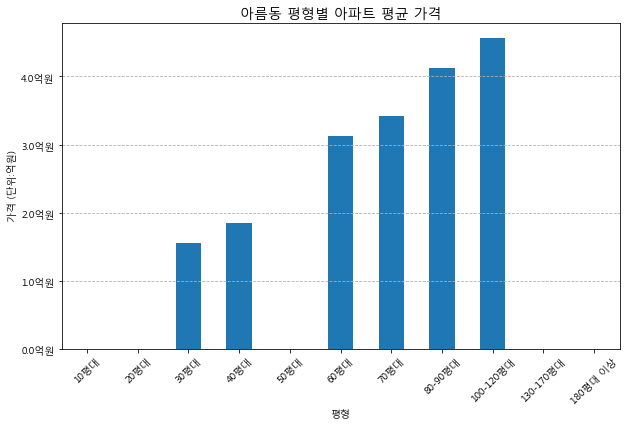

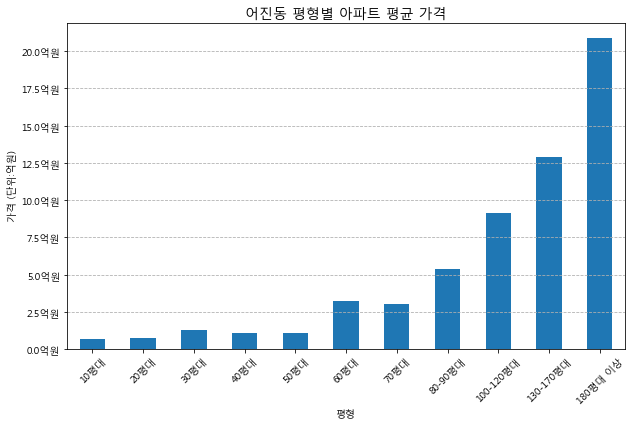

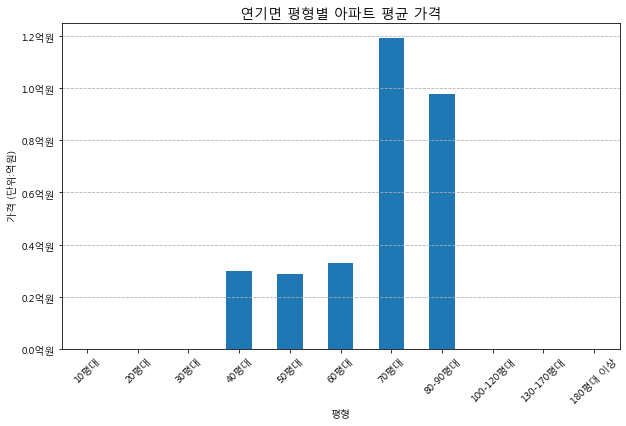

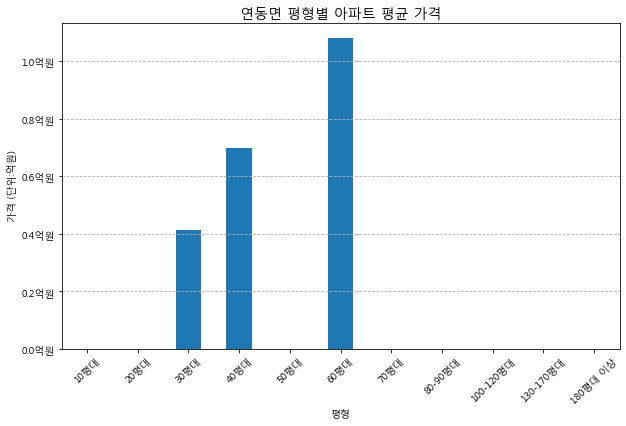

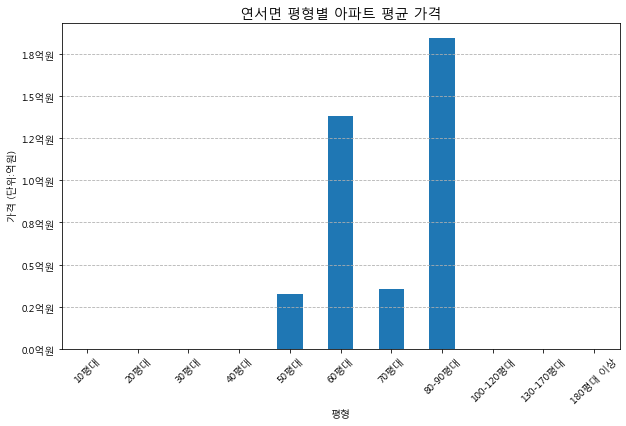

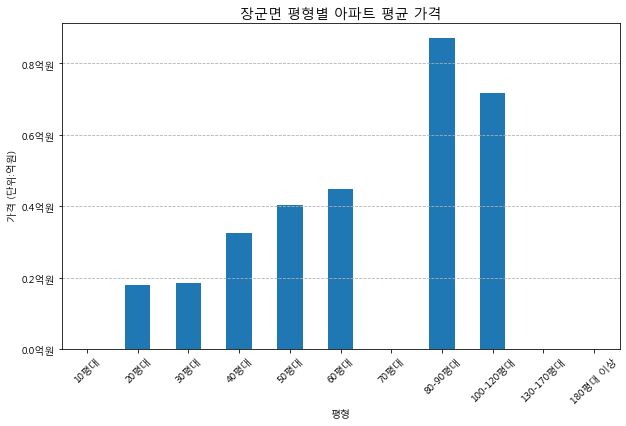

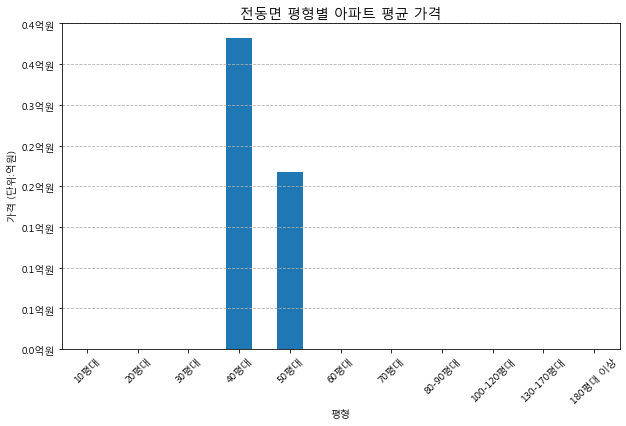

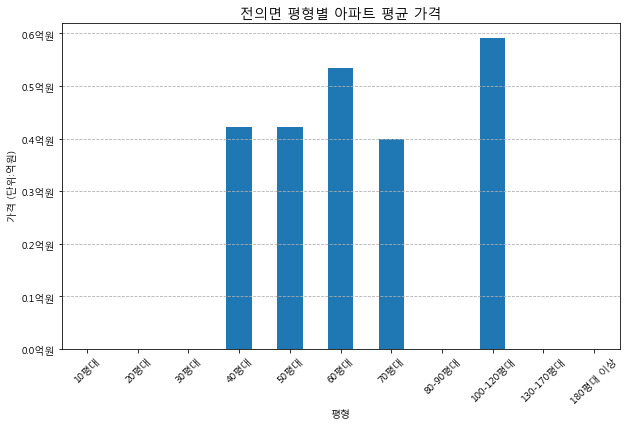

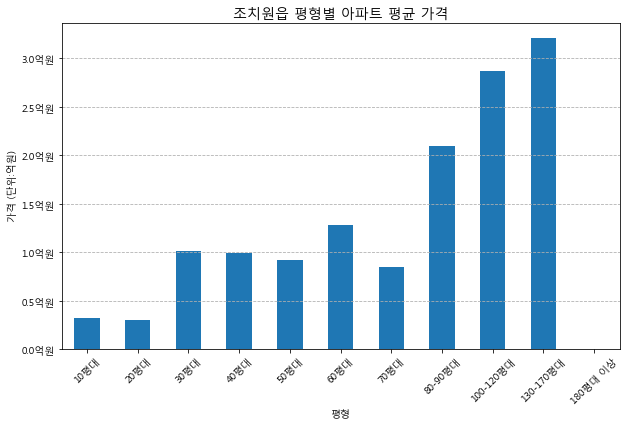

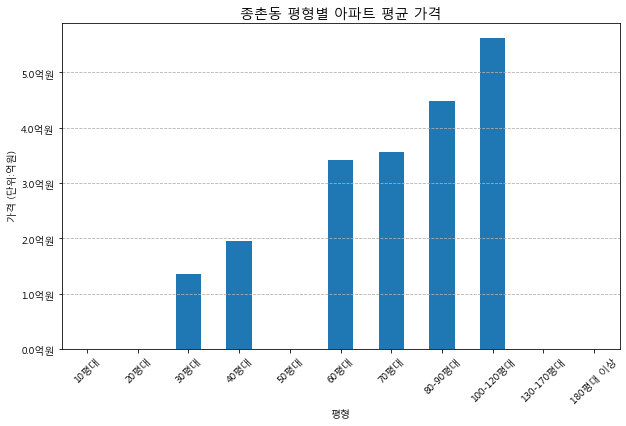

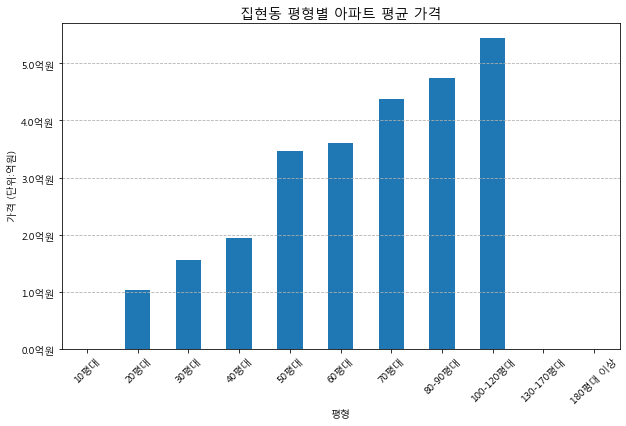

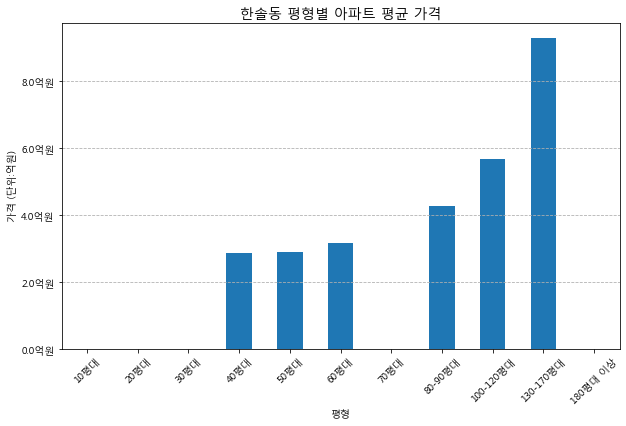

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df1 = pd.read_csv('./complex_20230308.csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도','시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']

df2 = pd.read_csv('./property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','평수','updated']

df_tot = df2.merge(df1, on='old_addr_idx')

df_apt_tot = df_tot[df_tot['property_type']=='apartment']
df_apt_sejong = df_apt_tot[df_apt_tot['시도']=='세종특별자치시']
df_apt_sejong['평수 반올림'] = round(df_apt_sejong['평수'], 0)

ranges = [(0, 20, '10평대'), (20, 30, '20평대'), (30, 40, '30평대'), (40,50,'40평대'), (50,60,'50평대'),(60,70,'60평대'),(70,80,'70평대'),(80,100,'80-90평대'),(100,130,'100-120평대'),(130,180,'130-170평대'),(180,280,'180평대 이상')]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

df_apt_sejong['평형'] = pd.cut(df_apt_sejong['평수 반올림'], bins=bins, labels=labels, include_lowest=True, right=False)
pd.set_option('display.max_rows', 5)

to_list = df_apt_sejong.groupby(['읍면동', '평형']).mean()
to_list.reset_index(inplace=True)

unique_list = to_list['읍면동'].unique().tolist()
unique_list

k=0
while k<len(unique_list):
    df = df_apt_sejong[df_apt_sejong['읍면동'] == unique_list[k]].groupby('평형').mean().reset_index()
    
    pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

    graph = df.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
    plt.rc('font', family="Malgun Gothic") 
    plt.title(unique_list[k]+' 평형별 아파트 평균 가격', fontsize=14)
    plt.ylabel('가격 (단위:억원)')
    graph.xaxis.set_tick_params(rotation=45, labelsize=10)
    graph.grid(True, axis='y', linestyle='--')
    

    def millions(x, pos):
        'The two args are the value and tick position'
        return '{:.1f}억원'.format(x*1e-8)
    graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))
    k=k+1


findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
findfont: Font family 'Malgun' not found.
/usr/lib/python3/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/events.py:88:

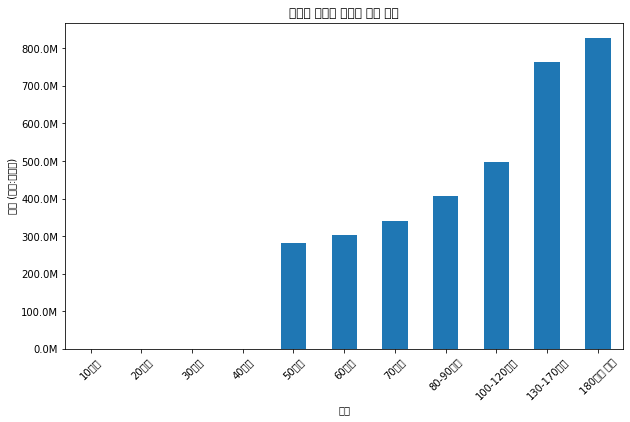

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_goeun_org.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('고운동 평형별 아파트 평균 가격')

plt.ylabel('가격 (단위:백만원)')

graph.xaxis.set_tick_params(rotation=45, labelsize=10)


def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}M'.format(x*1e-6)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

In [ ]:
df_geumnam = df_apt_sejong[df_apt_sejong['읍면동'] == '금남면']
df_geumnam


,pk,old_addr_idx,dong,ho,official_price,평수,updated_x,complex_name,property_type,시도,...,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated_y,평수 반올림,평형
5491441,00222551_0001_0001,3611034021_00320_00000_apartment,101,1001,149000000,43,2021-01-01,두진리버빌,apartment,세종특별자치시,...,용포리,용포2길,361104574405,3611034000,30083,320,0,2021-01-01,43,40평대
5491442,00222551_0001_0002,3611034021_00320_00000_apartment,101,1002,149000000,43,2021-01-01,두진리버빌,apartment,세종특별자치시,...,용포리,용포2길,361104574405,3611034000,30083,320,0,2021-01-01,43,40평대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895751,20329569_0002_0007,3611034046_00095_00000_apartment,주건축물제B,401,202000000,52,2021-01-01,금강의휴양림마을(프로방스빌),apartment,세종특별자치시,...,도남리,도남2길,361104574610,3611034000,30085,95,0,2021-01-01,52,50평대
11895752,20329569_0002_0008,3611034046_00095_00000_apartment,주건축물제B,402,210000000,54,2021-01-01,금강의휴양림마을(프로방스빌),apartment,세종특별자치시,...,도남리,도남2길,361104574610,3611034000,30085,95,0,2021-01-01,54,50평대


In [ ]:
df_geumnam['평형'].value_counts()

40평대         658
60평대         274
            ... 
130-170평대      0
180평대 이상       0
Name: 평형, Length: 11, dtype: int64

In [ ]:
df_geumnam_org = df_geumnam.groupby('평형').mean()
df_geumnam_org = df_geumnam_org.reset_index()
df_geumnam_org

<ipython-input-22-f43fc86b03ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_geumnam_org = df_geumnam.groupby('평형').mean()


,평형,official_price,평수,평수 반올림
0,10평대,NaN,NaN,NaN
1,20평대,NaN,NaN,NaN
...,...,...,...,...
9,130-170평대,NaN,NaN,NaN
10,180평대 이상,NaN,NaN,NaN


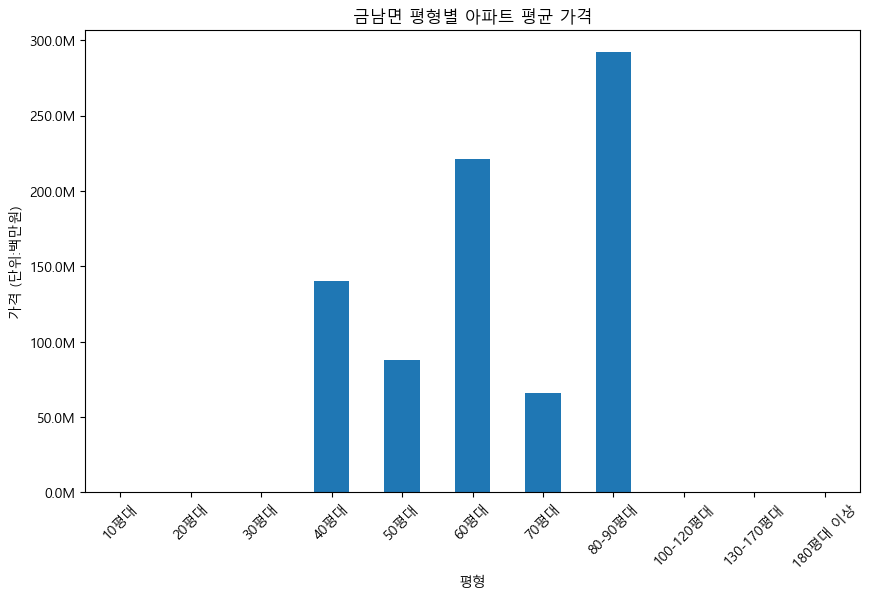

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_geumnam_org.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('금남면 평형별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)


def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.1f}M'.format(x*1e-6)
graph.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

In [ ]:
df_nasung = df_apt_sejong[df_apt_sejong['읍면동'] == '나성동']
df_nasung_org = df_nasung.groupby('평형').mean()
df_nasung_org = df_nasung_org.reset_index()
df_nasung_org

,평형,official_price,평수,평수 반올림
0,10평대,"69,476,923",18,18
1,20평대,"77,019,409",25,25
2,30평대,"83,775,186",33,32
3,40평대,"102,032,000",44,44
4,50평대,NaN,NaN,NaN
5,60평대,NaN,NaN,NaN
6,70평대,NaN,NaN,NaN
7,80-90평대,"764,097,768",89,89
8,100-120평대,"976,423,729",107,107
9,130-170평대,"1,456,250,000",147,147


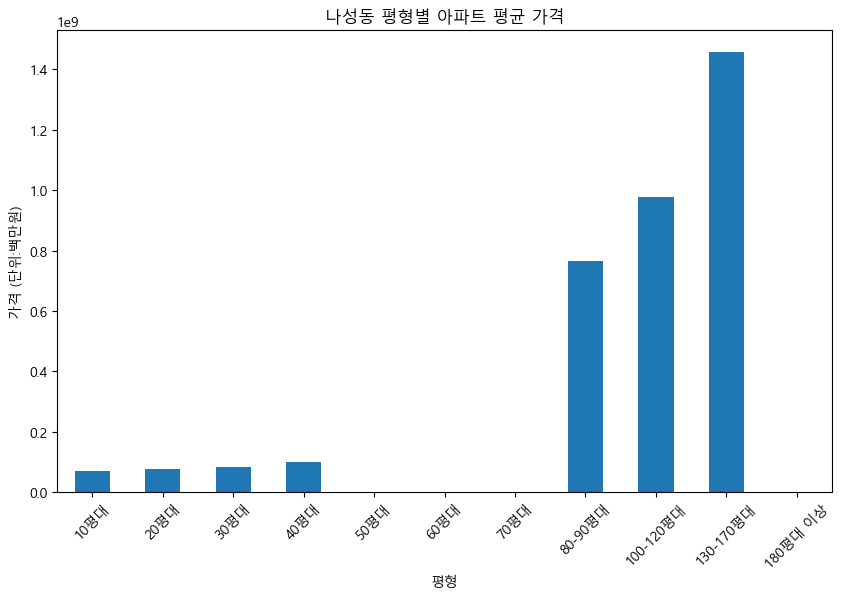

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_nasung_org.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('나성동 평형별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)

In [ ]:
df_nasung = df_apt_sejong[df_apt_sejong['읍면동'] == '금남면']
df_nasung = df_nasung.groupby('평형').mean()
df_nasung_org = df_goeun_org.reset_index(inplace=True)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_goeun_org.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('금남면 평형별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)

In [ ]:
df_dajeong = df_apt_sejong[df_apt_sejong['읍면동'] == '다정동']
df_dajeong_org = df_dajeong.groupby('평형').mean()
df_dajeong_org = df_dajeong_org.reset_index(inplace=True)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

graph = df_dajeong_org.plot(kind='bar', x='평형', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('다정동 평형별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)

AttributeError: 'NoneType' object has no attribute 'plot'

In [ ]:
df_apt_sejong_avg

official_price          평수      평수 반올림
읍면동  평형                                                
고운동  (129, 179]    7.646667e+08  136.159667  136.111111
     (179, 280]    8.267692e+08  207.425354  207.153846
     (59, 69]      3.015893e+08   59.875789   60.000776
     (69, 79]      3.414996e+08   73.953702   73.974641
     (79, 99]      4.056580e+08   85.230212   85.294394
     (99, 129]     4.972321e+08  106.221977  106.276671
금남면  (39, 49]      1.404255e+08   43.016261   43.010638
     (49, 59]      1.110600e+08   54.723800   54.683333
     (59, 69]      2.004606e+08   59.902826   59.967949
     (69, 79]      6.578000e+07   75.801500   76.200000
     (79, 99]      2.918947e+08   84.878886   85.000000
나성동  (129, 179]    1.456250e+09  147.469000  147.250000
     (19, 29]      7.690579e+07   24.927838   24.810481
     (29, 39]      8.379614e+07   32.429799   32.392771
     (39, 49]      1.020320e+08   44.203072   43.940000
     (79, 99]      7.373026e+08   87.328291   87.493286
     (9, 19]       7.099753e+07   17.919960   18.074074
     (99, 129]     9.617798e+08  104.844905  104.875630
다정동  (129, 179]    8.065000e+08  135.953400  136.000000
     (19, 29]      1.448760e+08   26.330000   26.000000
     (29, 39]      2.075469e+08   37.120000   37.000000
     (39, 49]      2.541034e+08   46.090878   46.000000
     (49, 59]      3.275873e+08   53.057424   53.142857
     (59, 69]      3.740559e+08   59.898877   59.965298
     (69, 79]      4.563785e+08   75.188749   75.364212
     (79, 99]      5.869561e+08   87.859294   87.958816
     (99, 129]     7.603688e+08  105.072764  105.231227
대평동  (129, 179]    1.297000e+09  145.674900  146.000000
     (49, 59]      3.191008e+08   51.386819   51.162791
     (59, 69]      3.138658e+08   59.937436   60.014205
     (69, 79]      4.791118e+08   72.547999   73.000000
     (79, 99]      5.790766e+08   89.210030   89.258854
     (99, 129]     8.109632e+08  100.678935  100.570113
도담동  (129, 179]    9.400000e+08  148.104000  148.000000
     (19, 29]      8.443618e+07   23.173996   23.033285
     (29, 39]      1.386903e+08   35.608260   35.272727
     (39, 49]      1.924780e+08   43.478746   43.538983
     (49, 59]      2.056533e+08   51.817933   52.000000
     (59, 69]      3.195838e+08   59.608229   59.590581
     (79, 99]      4.772164e+08   86.470283   86.572083
     (9, 19]       4.940000e+07   18.270000   18.000000
     (99, 129]     6.560925e+08  102.262873  102.326019
보람동  (129, 179]    1.342143e+09  158.645957  158.714286
     (19, 29]      8.526761e+07   22.509204   22.632042
     (29, 39]      1.652143e+08   36.903782   36.978022
     (39, 49]      2.203333e+08   46.640000   47.000000
     (59, 69]      3.988386e+08   59.976443   60.000000
     (79, 99]      5.101477e+08   86.750635   86.763427
     (9, 19]       5.076739e+07   17.027315   17.152174
     (99, 129]     6.910757e+08  106.718228  106.826877
부강면  (19, 29]      6.039077e+07   23.627342   23.415385
     (29, 39]      7.348571e+07   36.387143   36.571429
     (39, 49]      4.607143e+07   45.713576   45.628571
     (49, 59]      5.026951e+07   50.585610   50.804878
     (59, 69]      6.050051e+07   61.011026   61.033333
     (69, 79]      1.117962e+08   72.609615   72.730769
     (79, 99]      9.485978e+07   82.679304   82.793478
     (99, 129]     8.438750e+07  108.180000  108.000000
새롬동  (129, 179]    1.187182e+09  131.451382  131.363636
     (19, 29]      1.207143e+08   21.920000   22.000000
     (29, 39]      2.047214e+08   36.641940   37.000000
     (39, 49]      2.665714e+08   46.700000   47.000000
     (59, 69]      4.067739e+08   59.991323   60.048420
     (69, 79]      4.482151e+08   73.214631   73.423387
     (79, 99]      6.065239e+08   86.651995   86.720292
     (99, 129]     7.527161e+08  105.599999  105.810927
소담동  (129, 179]    1.268667e+09  154.406558  154.583333
     (19, 29]      7.599012e+07   24.724919   24.728395
     (29, 39]      8.784667e+07   31.037890   31.200000
     (39, 49]      1.010000e+08   41.3600

In [ ]:
df_apt_sejong['평수'].nunique()

1684

In [ ]:
bins = range(59, 101, 10)  # Define the bin edges
labels = ['{}-{}'.format(i, i+9) for i in range(0, 100, 10)]  # Define the bin labels
df['bin'] = pd.cut(df['평수'], bins=bins, labels=labels)  # Assign each value to the appropriate bin

In [ ]:
# 누락데이터 처리
## df1['시도'].fillna(df1.groupby('old_addr_idx')['시도'].ffill(), inplace=True)

In [ ]:
df2.isnull().sum()

pk                0
old_addr_idx      0
dong              0
ho                3
official_price    0
평수                0
updated           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
graph = df_sejong_dong_apt.plot(kind='bar', x='읍면동', y='official_price', width = 0.5, legend = None, figsize=(10,6))
plt.rc('font', family="Malgun Gothic") 
plt.title('세종시 동별 아파트 평균 가격')
plt.ylabel('가격 (단위:백만원)')
graph.xaxis.set_tick_params(rotation=45, labelsize=10)